In [ ]:
# Importing Pandas, NumPy, Seaborn, Matplotlib

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [88]:
# Reading and saving the dataset

In [89]:
df = pd.read_csv('ecommerce_product_dataset.csv')

df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [90]:
# Number of columns and rows

In [91]:
df.shape

(1000, 11)

In [92]:
# number of rows * number of columns

In [93]:
df.size

11000

In [94]:
# Percent of missing values by columns

In [95]:
Missing_values = df.isnull().sum()
Total_rows = len(df)
percent_missing = (Missing_values/Total_rows) * 100
percent_missing

ProductID        0.0
ProductName      0.0
Category         0.0
Price            0.0
Rating           0.0
NumReviews       0.0
StockQuantity    0.0
Discount         0.0
Sales            0.0
DateAdded        0.0
City             0.0
dtype: float64

In [96]:
# Getting summary statistics

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductID,1000.0,500.50000,288.819436,1.00,250.7500,500.50,750.2500,1000.00
Price,1000.0,253.77551,141.403620,10.11,133.0925,251.31,375.8275,499.74
Rating,1000.0,3.02560,1.151004,1.00,2.1000,3.10,4.0000,5.00
NumReviews,1000.0,2498.75300,1463.241871,3.00,1201.7500,2476.00,3797.5000,4994.00
StockQuantity,1000.0,495.39500,292.799253,0.00,241.7500,505.00,743.5000,993.00
Discount,1000.0,0.25164,0.146455,0.00,0.1300,0.25,0.3800,0.50
Sales,1000.0,1011.03700,582.113466,0.00,502.0000,998.00,1540.0000,1997.00


In [98]:
# Creating a list for numerical variables

In [99]:
numerical_var = list(set(df.dtypes[df.dtypes != object].index) - set(['ProductID']))

In [100]:
# Getting mean

In [101]:
df[numerical_var].mean()

StockQuantity     495.39500
NumReviews       2498.75300
Rating              3.02560
Price             253.77551
Sales            1011.03700
Discount            0.25164
dtype: float64

In [102]:
# Getting median

In [103]:
df[numerical_var].median()

StockQuantity     505.00
NumReviews       2476.00
Rating              3.10
Price             251.31
Sales             998.00
Discount            0.25
dtype: float64

In [104]:
# Getting mode

In [105]:
df[numerical_var].mode().iloc[0]

StockQuantity    270.00
NumReviews       595.00
Rating             1.10
Price             16.32
Sales            400.00
Discount           0.41
Name: 0, dtype: float64

In [106]:
# Getting correlations

In [107]:
df[numerical_var].corr()

,StockQuantity,NumReviews,Rating,Price,Sales,Discount
StockQuantity,1.000000,-0.020958,0.000576,-0.006409,-0.001458,-0.007659
NumReviews,-0.020958,1.000000,-0.009832,0.012782,0.056586,-0.015579
Rating,0.000576,-0.009832,1.000000,-0.006462,0.008475,0.024495
Price,-0.006409,0.012782,-0.006462,1.000000,0.029076,-0.045133
Sales,-0.001458,0.056586,0.008475,0.029076,1.000000,0.027413
Discount,-0.007659,-0.015579,0.024495,-0.045133,0.027413,1.000000


In [108]:
# Getting variance

In [109]:
df[numerical_var].var()

StockQuantity    8.573140e+04
NumReviews       2.141077e+06
Rating           1.324809e+00
Price            1.999498e+04
Sales            3.388561e+05
Discount         2.144896e-02
dtype: float64

In [110]:
# Identifying outliers

In [111]:
def identify_outliers(series):
  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = series[(series < lower_bound) & (series > upper_bound)]
  return outliers

outliers_dict = {}
for i in numerical_var:
  outliers_dict[i] = identify_outliers(df[i])

for col, outliers in outliers_dict.items():
  print(f"Outliers in column {col}: {outliers}")

Outliers in column StockQuantity: Series([], Name: StockQuantity, dtype: int64)
Outliers in column NumReviews: Series([], Name: NumReviews, dtype: int64)
Outliers in column Rating: Series([], Name: Rating, dtype: float64)
Outliers in column Price: Series([], Name: Price, dtype: float64)
Outliers in column Sales: Series([], Name: Sales, dtype: int64)
Outliers in column Discount: Series([], Name: Discount, dtype: float64)


In [112]:
# piechart

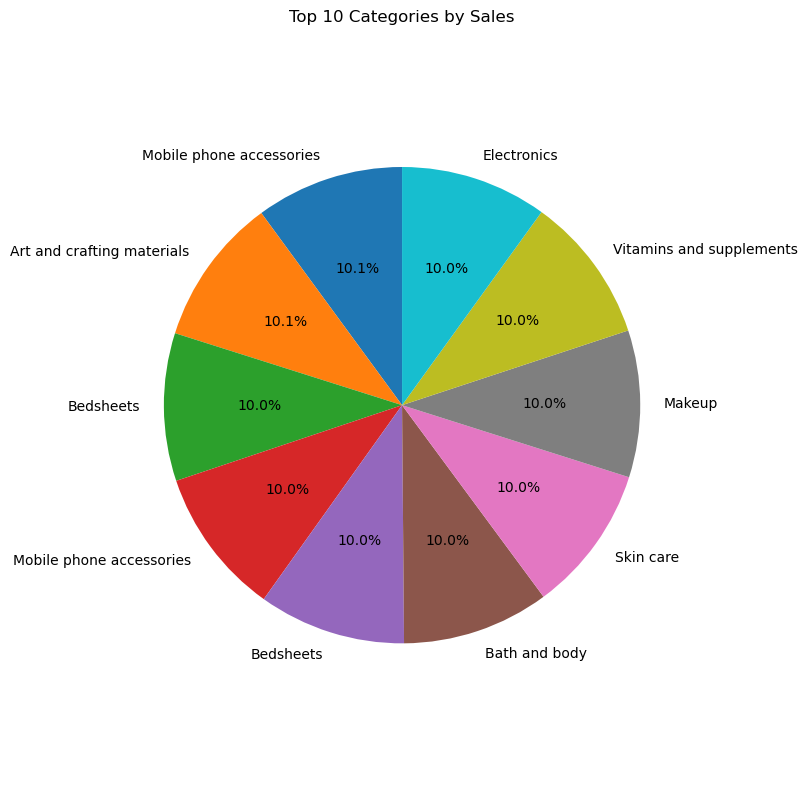

In [113]:
df_top10 = df.nlargest(10, 'Sales')
plt.figure(figsize=(8, 8))
plt.pie(df_top10['Sales'], labels=df_top10['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Categories by Sales')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [114]:
# Data visualizations - barplots

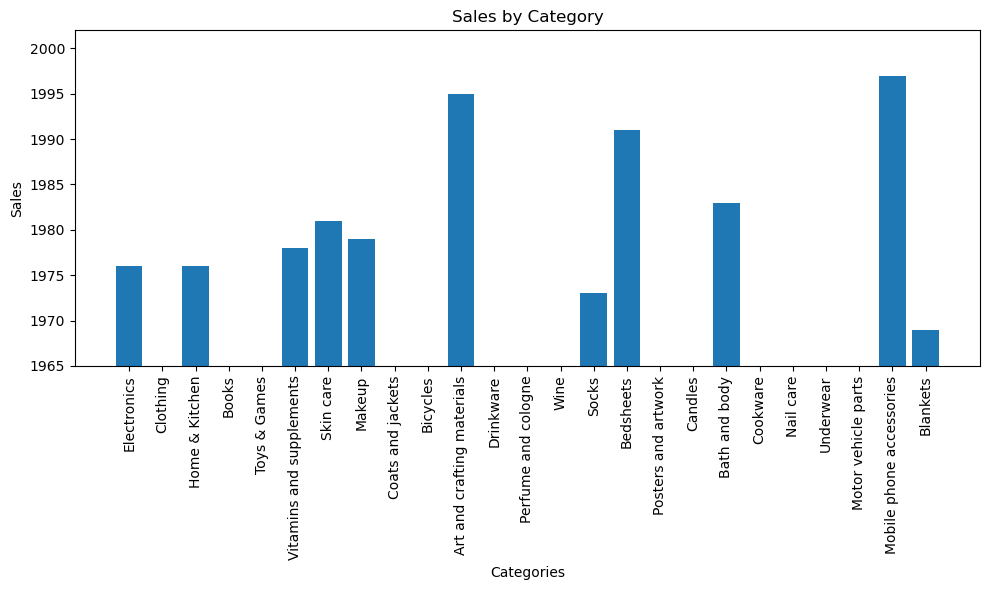

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(df['Category'], df['Sales'])

plt.xlabel('Categories')
plt.ylabel('Sales')
plt.title('Sales by Category')

plt.xticks(rotation=90)
plt.ylim(1965, df_top10['Sales'].max() + 5)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.tight_layout()
plt.show()

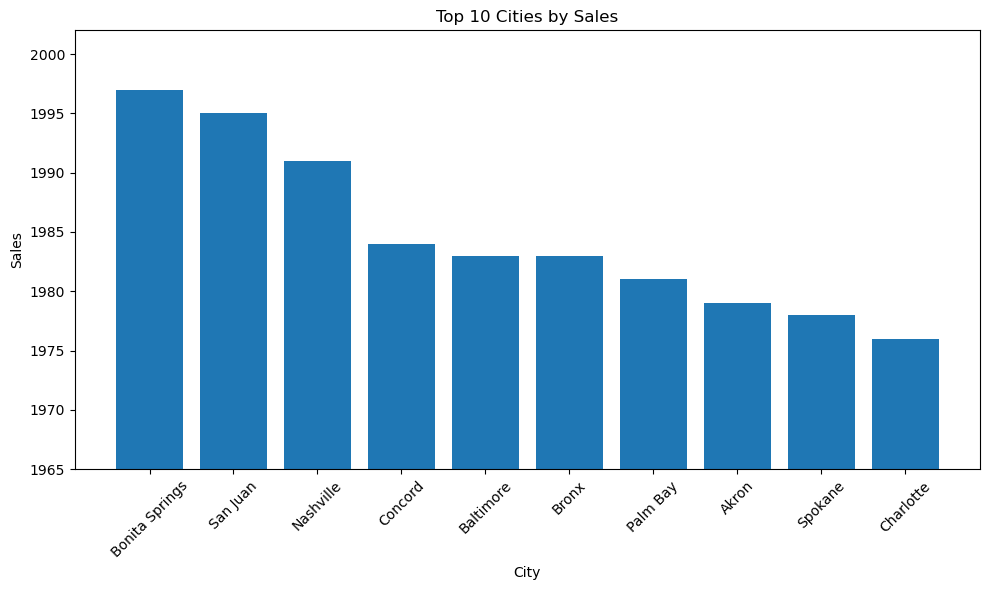

In [116]:
df_top10 = df.nlargest(10, 'Sales')
plt.figure(figsize=(10, 6))

plt.bar(df_top10['City'], df_top10['Sales'])

plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 10 Cities by Sales')

plt.xticks(rotation=45)
plt.ylim(1965, df_top10['Sales'].max() + 5)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.tight_layout()
plt.show()

In [117]:
# Data visualizations - boxplots

Text(0.5, 1.0, 'Price')

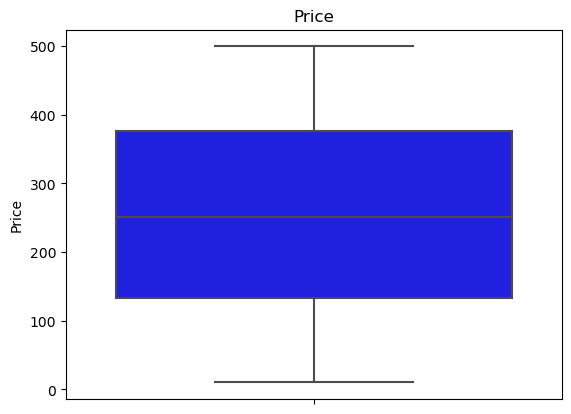

In [118]:
sns.boxplot(y="Price", color = 'b', data = df) 
plt.title('Price')

Text(0.5, 1.0, 'Rating')

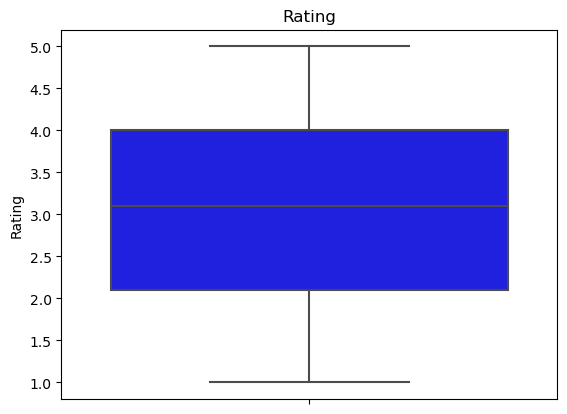

In [119]:
sns.boxplot(y="Rating", color = 'b', data = df) 
plt.title('Rating')

Text(0.5, 1.0, 'Number of Reviews')

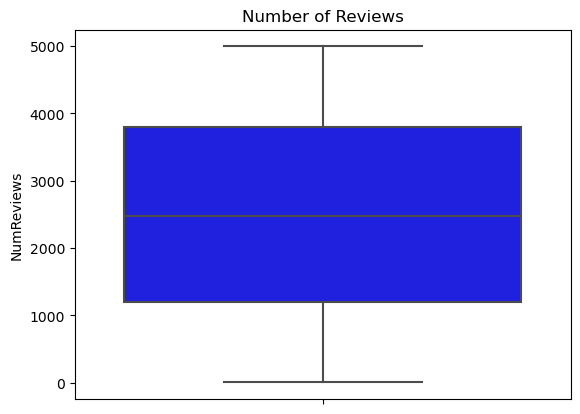

In [120]:
sns.boxplot(y="NumReviews", color = 'b', data = df) 
plt.title('Number of Reviews')

Text(0.5, 1.0, 'Stock Quantity')

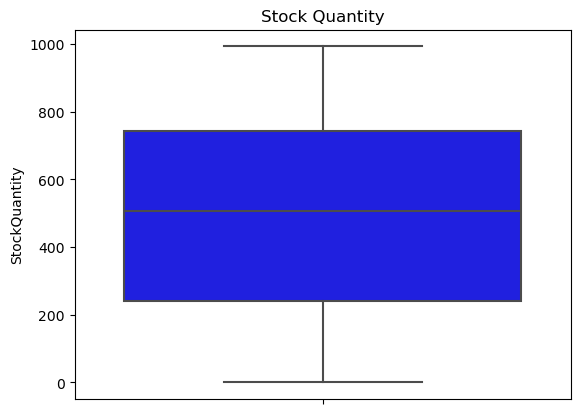

In [121]:
sns.boxplot(y="StockQuantity", color = 'b', data = df) 
plt.title('Stock Quantity')

Text(0.5, 1.0, 'Discount')

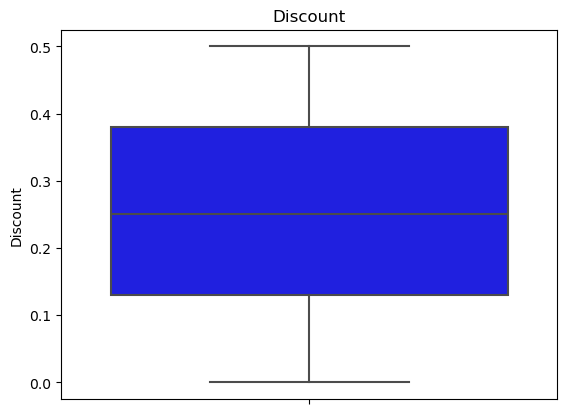

In [122]:
sns.boxplot(y="Discount", color = 'b', data = df) 
plt.title('Discount')

Text(0.5, 1.0, 'Sales')

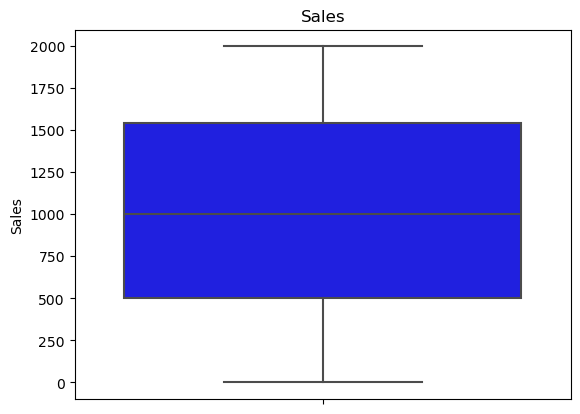

In [123]:
sns.boxplot(y="Sales", color = 'b', data = df) 
plt.title('Sales')

In [124]:
# Data visualizations - scatterplots

Text(0.5, 1.0, 'Price versus Sales')

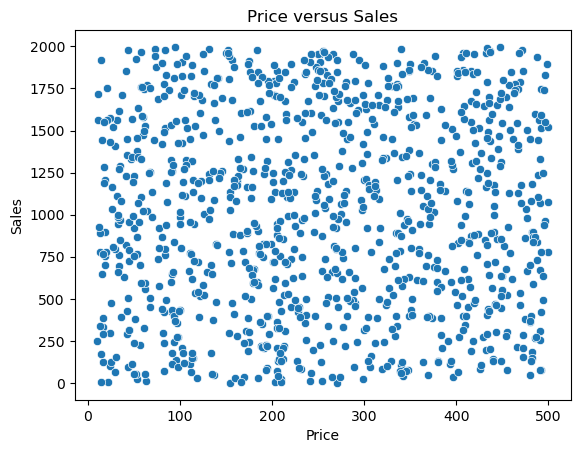

In [125]:
sns.scatterplot(x = "Price", 
                y = "Sales", data=df) 
plt.title('Price versus Sales')

Text(0.5, 1.0, 'Rating versus Sales')

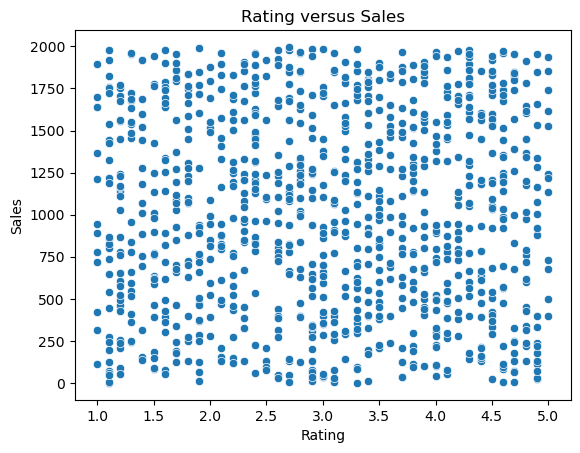

In [126]:
ax = sns.scatterplot(x="Rating", y="Sales", data=df)
plt.title('Rating versus Sales')

Text(0.5, 1.0, 'Number of Reviews versus Sales')

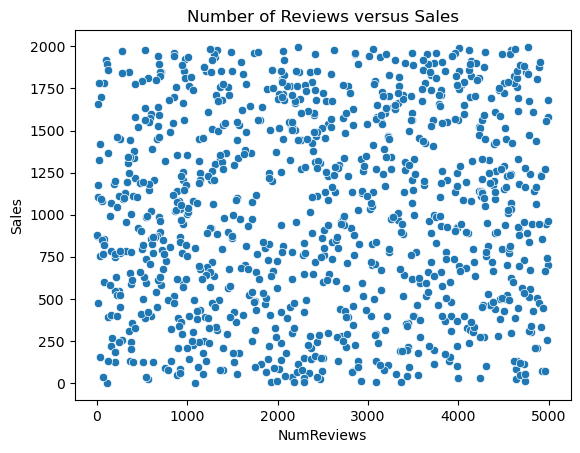

In [127]:
ax = sns.scatterplot(x="NumReviews", y="Sales", data=df)
plt.title('Number of Reviews versus Sales')

Text(0.5, 1.0, 'Discounts versus Sales')

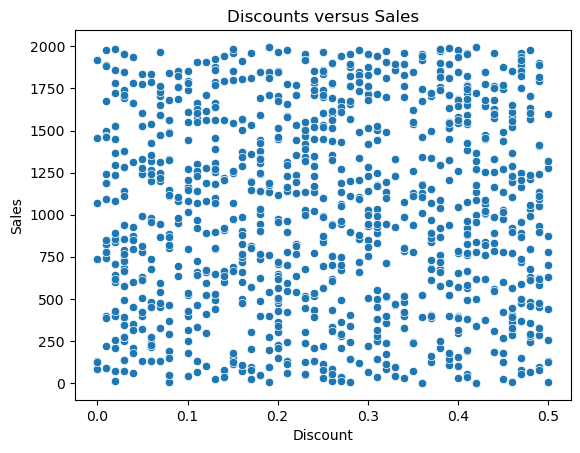

In [128]:
ax = sns.scatterplot(x="Discount", y="Sales", data=df)
plt.title('Discounts versus Sales')

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
# Fitting a linear regression model

In [131]:
from sklearn.linear_model import LinearRegression
target = 'Sales'
numerical_variables = set(df.columns) - set(df.dtypes[df.dtypes == object].index)
numerical_variables = list(set(df.dtypes[df.dtypes != object].index) - set(['ProductID']))
input_col = list(set(numerical_variables) - set(['Sales']))

model = LinearRegression()
model.fit(df[input_col], df[target])

print('Model coefficients:')
print(model.coef_)
print('\n')

r2_value = round(100 * model.score(df[input_col], df[target]), 2)
print(f'R2 value: {r2_value}\n')

pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = df[target]
pred_vs_actual['predicted'] = np.round(model.predict(df[input_col]), 0)
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']

print(pred_vs_actual.head())

Model coefficients:
[2.83745370e-04 2.25771208e-02 4.30110632e+00 1.22409133e-01
 1.16985148e+02]


R2 value: 0.5

   actual  predicted  error
0     466     1032.0 -566.0
1    1332     1024.0  308.0
2     252     1003.0 -751.0
3    1806     1018.0  788.0
4    1508      993.0  515.0


In [132]:
# Assessing the model

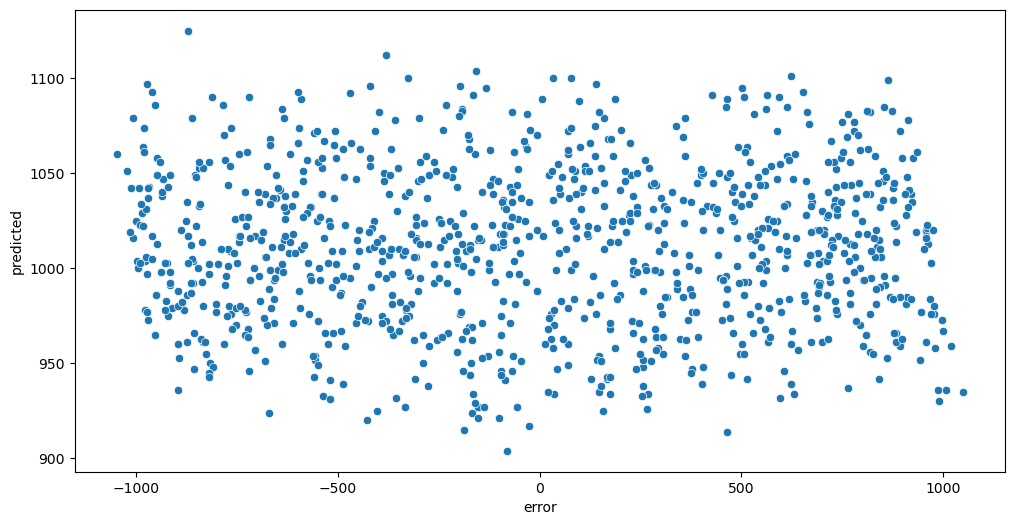

In [133]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x='error', y='predicted', data=pred_vs_actual) 

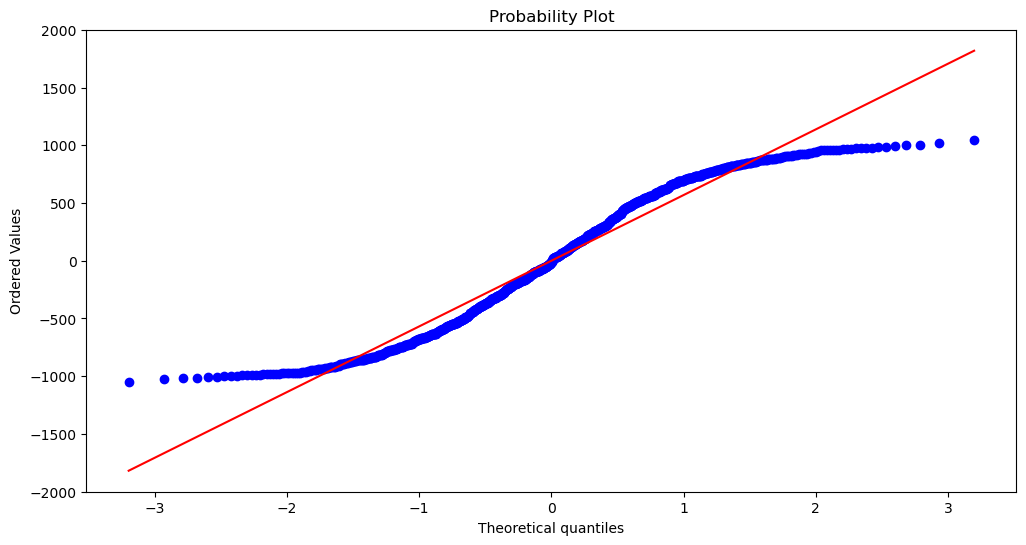

In [134]:
import scipy as sp 
fig, ax = plt.subplots(figsize=(12,6))
_, (__, ___, r) = sp.stats.probplot(pred_vs_actual['error'], plot=ax, fit=True) 

In [135]:
# Dropping numerical variables with zero variance

In [136]:
categorical_variables = list(set(df.dtypes[df.dtypes == object].index))
zero_variance_categorical_variables = [col for col in categorical_variables if df[col].nunique() == 1]
df = df.drop(columns=zero_variance_categorical_variables)

In [137]:
high_cardinality_categorical_variables = []
for i in df.select_dtypes(include=['object']).columns:
    if df[i].nunique() > 200:
        high_cardinality_categorical_variables.append(i)
        
df = df.drop(columns=high_cardinality_categorical_variables)

In [138]:
# Splitting the data

In [139]:
from sklearn.model_selection import train_test_split
target = 'Sales'
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()
input_col = list(set(numerical_variables) - set([target]))
X = df[input_col]
Y = df[target]
if Y.dtype in ['float64', 'int64']:
    Y = pd.cut(Y, bins=2, labels=[0, 1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [140]:
# Fitting classification models: KNN, Random Forests, Decision Trees, Logistic Regression

In [141]:
# Decision trees

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [142]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [143]:
# Scaling the data

from sklearn import preprocessing 
array = df[numerical_variables].values 
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 
df[numerical_variables] = pd.DataFrame(data_scaler.fit_transform(array), 
                                 columns = numerical_variables) 

In [144]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
# Standardization

from sklearn.preprocessing import StandardScaler 
new_col = [i+'_standardized' for i in numerical_variables]
array = df[numerical_variables].values 
data_scaler = StandardScaler().fit(array) 
df[new_col] = pd.DataFrame(data_scaler.transform(array))

In [146]:
# Logistic Regression]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [147]:
# computes the confusion matrix and performence indicators

In [148]:
from sklearn.metrics import confusion_matrix
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [149]:
pred_Y_lr = lr.predict(X_test) 
pred_Y_dt = dt.predict(X_test) 
pred_Y_rf = rf.predict(X_test) 
pred_Y_knn = knn.predict(X_test)

In [150]:
# Accuracy Rate, Sensitivity, Specificity

In [151]:
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [152]:
perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.496970,0.335227,0.681818
Decision Trees,0.481818,0.164773,0.844156
Random Forest,0.524242,0.369318,0.701299
K-NN,0.457576,0.380682,0.545455


In [153]:
# ROC Curve - Random Forest

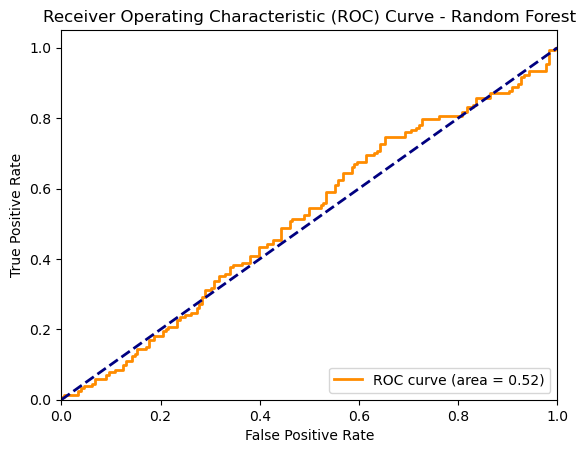

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
score_Y_rf = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, score_Y_rf[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [155]:
# ROC curve - Decision Trees

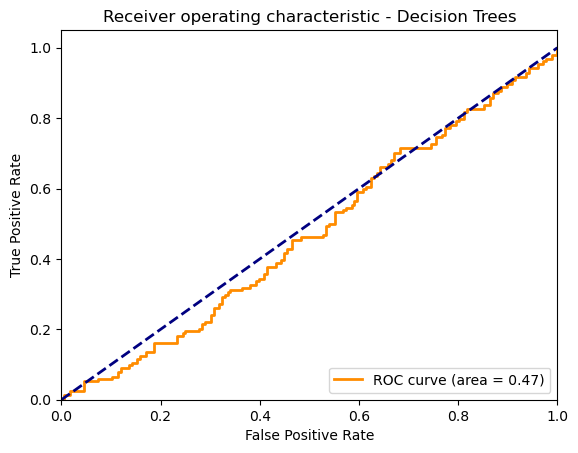

In [164]:
from sklearn.metrics import roc_curve, auc
score_Y_lr = lr.predict_proba(X_test)
score_Y_lr 
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)
score_Y_lr = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Decision Trees')
plt.legend(loc="lower right")
plt.show()

In [157]:
# ROC curve - KNN

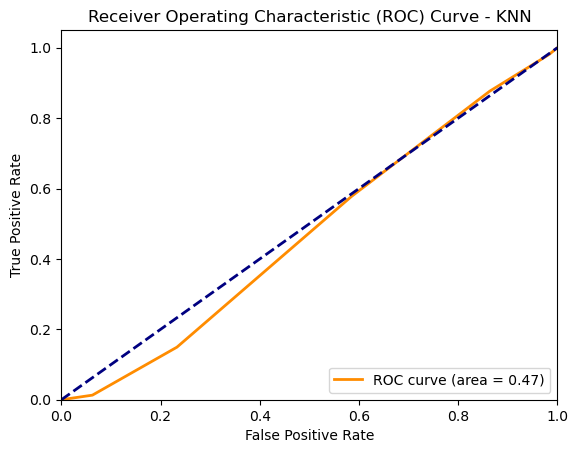

In [163]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
knn = KNeighborsClassifier(n_neighbors=5)  # Example: KNN with 5 neighbors
knn.fit(X_train, Y_train)
score_Y_knn = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, score_Y_knn[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()


In [159]:
# ROC curve - Logistic regression

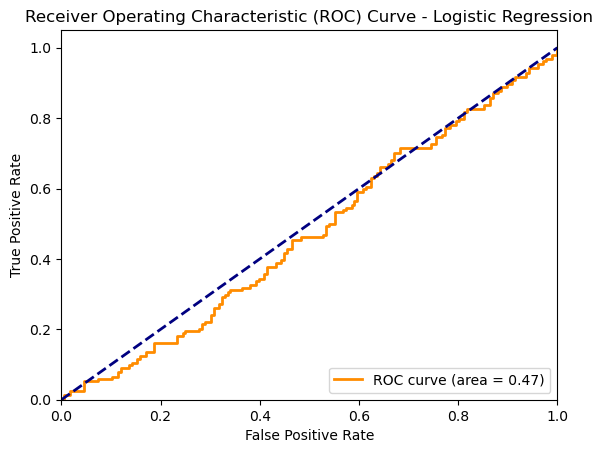

In [160]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
logreg = LogisticRegression()  # Example: Logistic Regression classifier
logreg.fit(X_train, Y_train)
score_Y_logreg = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, score_Y_logreg[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()